In [1]:
!pip install -q streamlit

     |████████████████████████████████| 7.1MB 2.7MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 4.4MB 47.8MB/s 
     |████████████████████████████████| 501kB 49.7MB/s 
     |████████████████████████████████| 112kB 48.4MB/s 
     |████████████████████████████████| 122kB 49.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.2 which is incompatible.


In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2020-07-11 11:27:52--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.229.170.137, 54.161.19.10, 34.194.108.77, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.229.170.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  51.6MB/s    in 0.3s    

2020-07-11 11:27:52 (51.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [6]:
!unzip converted_keras.zip

Archive:  converted_keras.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


In [23]:
%%file deepclf.py

import streamlit as st
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

st.title("Deep Learning Classifier")
st.markdown("We trained a model with pictures of bottles and controllers")

image_file = st.file_uploader("Choose an image", type="jpg")

if image_file is not None:
  image=Image.open(image_file)
  st.image(image,caption="Uploaded Image")
  st.markdown("Classifying ...")

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)

  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  st.markdown(f"Prediction is: {prediction}")

Overwriting deepclf.py


In [24]:
get_ipython().system_raw('./ngrok http 8501 &')

In [25]:
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://3784add8203b.ngrok.io


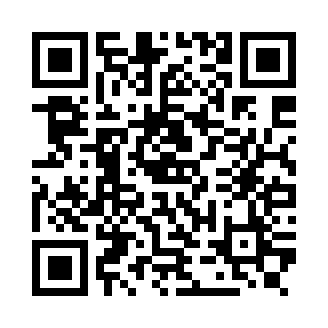

In [26]:
import pyqrcode
url = pyqrcode.create('https://3784add8203b.ngrok.io')
url.png('uca-url.png', scale=8)
from IPython.display import Image
Image('uca-url.png')

In [27]:
!streamlit run deepclf.py

2020-07-11 11:44:59.545435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.73.122.106:8501

2020-07-11 11:45:01.301665: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-11 11:45:01.304642: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-07-11 11:45:01.304686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c12dbaf5e5b3): /proc/driver/nvidia/version does not exist
2020-07-11 11:45:01.310821: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-07-11 11:45:01.311062: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2c

In [16]:
!pip install pyqrcode pypng

     |████████████████████████████████| 655kB 2.7MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=916a440a246221da8c5084bf6a3e3f8de8e5800a817c7ba61ab2e147574b23bb
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng
